# Processamento de Linguagem Natural

## Modelo 'bag-of-words': 
- 1) Contar qts vezes uma palavra ocorre na mensagem (frequencia de termo)
- 2) Pesar as contagens (tokens frequentes recebem menor peso, 'frequencia inversa do documento')
- 3) Normalizar os vetores para o comprimento da unidade, para abstrair o comp do texto original (norma L2)
                  

In [1]:
pip install nltk

  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434679 sha256=ac6fceb373ccc8ed53b04671ed2a30c86776fa3611cd8b202bbdf66a707d1824
  Stored in directory: c:\users\gabriel\appdata\local\pip\cache\wheels\ff\d5\7b\f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155
Successfully built nltk
Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
messages = [line.rstrip() for line in open('C:/Users/Gabriel/AulasUdemy/original/Python-Data-Science-and-Machine-Learning-Bootcamp/5. Machine Learning/Processamento de linguagem natural/smsspamcollection/SMSSpamCollection')]

In [6]:
print(len(messages))

5574


In [7]:
messages[10]

"ham\tI'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [8]:
for message_number, message in enumerate(messages[:15]):
    print(message_number, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [9]:
import pandas as pd

In [10]:
messages = pd.read_csv('C:/Users/Gabriel/AulasUdemy/original/Python-Data-Science-and-Machine-Learning-Bootcamp/5. Machine Learning/Processamento de linguagem natural/smsspamcollection/SMSSpamCollection', 
                       sep='\t', names=['label', 'mensagem'])

In [11]:
messages

,label,mensagem
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
messages.describe()

,label,mensagem
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
messages.groupby('label').describe()

mensagem                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [15]:
messages['lenght'] = messages['mensagem'].apply(len)

In [16]:
messages

,label,mensagem,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


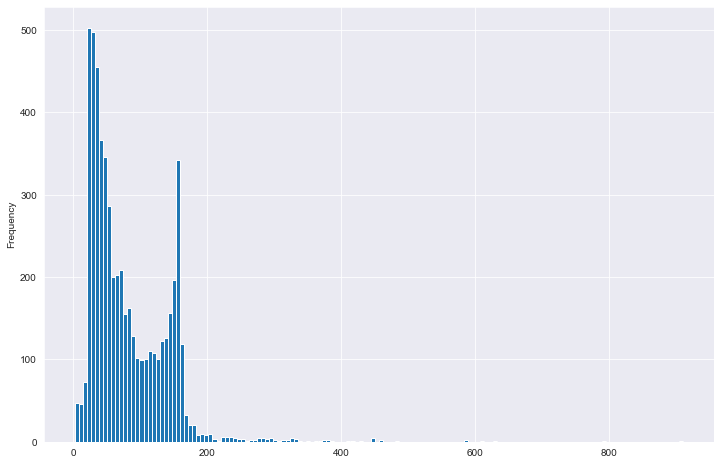

In [17]:
plt.figure(figsize=(12,8))
messages['lenght'].plot(kind='hist', bins=150)

In [18]:
messages[messages['lenght']>= 700]['mensagem']

1085    For me the love should start with attraction.i...
1863    The last thing i ever wanted to do was hurt yo...
Name: mensagem, dtype: object

In [19]:
messages[messages['lenght']>= 700]['mensagem'].iloc[1]

"The last thing i ever wanted to do was hurt you. And i didn't think it would have. You'd laugh, be embarassed, delete the tag and keep going. But as far as i knew, it wasn't even up. The fact that you even felt like i would do it to hurt you shows you really don't know me at all. It was messy wednesday, but it wasn't bad. The problem i have with it is you HAVE the time to clean it, but you choose not to. You skype, you take pictures, you sleep, you want to go out. I don't mind a few things here and there, but when you don't make the bed, when you throw laundry on top of it, when i can't have a friend in the house because i'm embarassed that there's underwear and bras strewn on the bed, pillows on the floor, that's something else. You used to be good about at least making the bed."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DB11310>,
      dtype=object)

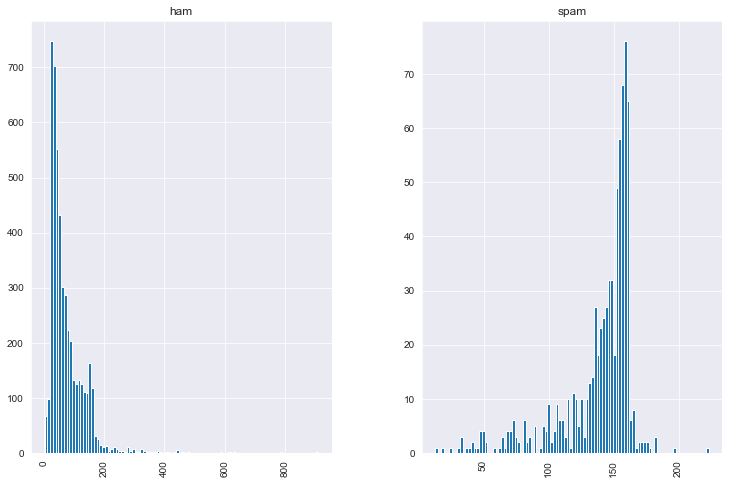

In [20]:
messages.hist(bins=100, column='lenght', by='label', figsize=(12,8))

In [21]:
import string

In [22]:
mess = 'MensagemExemplo! Notem: ela possui pontuação.'

In [23]:
letras = [x for x in mess]

In [24]:
letras

['M',
 'e',
 'n',
 's',
 'a',
 'g',
 'e',
 'm',
 'E',
 'x',
 'e',
 'm',
 'p',
 'l',
 'o',
 '!',
 ' ',
 'N',
 'o',
 't',
 'e',
 'm',
 ':',
 ' ',
 'e',
 'l',
 'a',
 ' ',
 'p',
 'o',
 's',
 's',
 'u',
 'i',
 ' ',
 'p',
 'o',
 'n',
 't',
 'u',
 'a',
 'ç',
 'ã',
 'o',
 '.']

In [25]:
sem_pt = [y for y in mess if y not in string.punctuation]

In [26]:
sem_pt

['M',
 'e',
 'n',
 's',
 'a',
 'g',
 'e',
 'm',
 'E',
 'x',
 'e',
 'm',
 'p',
 'l',
 'o',
 ' ',
 'N',
 'o',
 't',
 'e',
 'm',
 ' ',
 'e',
 'l',
 'a',
 ' ',
 'p',
 'o',
 's',
 's',
 'u',
 'i',
 ' ',
 'p',
 'o',
 'n',
 't',
 'u',
 'a',
 'ç',
 'ã',
 'o']

In [27]:
juntando = ''.join(sem_pt)

In [28]:
juntando

'MensagemExemplo Notem ela possui pontuação'

In [29]:
from nltk.corpus import stopwords

In [30]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
tst = 'Sample Message! Notice: it has punctuation.'

In [32]:
clean_mess = [x for x in tst.split() if x.lower() not in stopwords.words('english')]

In [33]:
clean_mess

['Sample', 'Message!', 'Notice:', 'punctuation.']

In [34]:
def txt_process(message):
    # Retira as pontuações
    nopunc = [car for car in message if car not in string.punctuation]
    
    # juntar a string
    nopunc = ''.join(nopunc)
    
    # remover as stopwords
    sms = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return sms

In [35]:
messages

,label,mensagem,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [36]:
messages['mensagem'].head(5).apply(txt_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: mensagem, dtype: object

In [37]:
from sklearn.feature_extraction.text import CountVectorizer    

In [38]:
bow_transformer = CountVectorizer(analyzer=txt_process).fit(messages['mensagem'])

In [39]:
print(len(bow_transformer.vocabulary_))

11425


In [40]:
mensagem4 = messages['mensagem'][3]
mensagem4

'U dun say so early hor... U c already then say...'

In [41]:
bow4 = bow_transformer.transform([mensagem4])

In [42]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [43]:
print(bow4.shape)

(1, 11425)


In [44]:
bow_transformer.get_feature_names()[9554]

'say'

In [45]:
bow_transformer.get_feature_names()[6222]

'early'

In [46]:
messages

,label,mensagem,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [52]:
messages_bow = bow_transformer.transform(messages['mensagem'])    # Esse é o 'BAG OF WORDS'

In [49]:
messages_bow

<5572x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [50]:
from sklearn.feature_extraction.text import TfidfTransformer    # classe pra auxiliar a contagem das palavras

In [51]:
Tf_transformer = TfidfTransformer()

In [53]:
Tf_transformer = Tf_transformer.fit(messages_bow)

In [54]:
tfidf4 = Tf_transformer.transform(bow4)

In [58]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [57]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067
